In [13]:
# 在这部分我想探究的是Ω的值是否随着p的增大而发生变化，k保存的是序号数组，v是对-0.1、-0.01、-0.001处理后的数据
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import convolve

# 禁用LaTeX渲染
matplotlib.rcParams['text.usetex'] = False

size = 100
matrix = np.loadtxt('_0.1.npy')
# 对矩阵中存在的异常值进行处理
matrix[np.isnan(matrix)] = 0
# 现在矩阵中存放的是处理好的数据，其中横坐标表示SNR（1-100）；纵坐标表示N（2-20）

new_matrix = np.zeros((100, 100))

for i in range(100):  # 遍历纵坐标
    for j in range(100):  # 遍历横坐标
        # 横坐标的平方乘以纵坐标的值
        new_matrix[i, j] = (j+1) ** 2 *(int(i+10)/10)*2
        
        

rows = cols = 100

# 将序号和值组合成一个二维数组
combined_array = np.zeros((rows * cols, 2))  # 每行包含序号和值

# 填充组合数组
for i in range(rows):
    for j in range(cols):
        combined_array[i * cols + j, 0] = new_matrix[i, j]
        combined_array[i * cols + j, 1] = matrix[i, j]

# 按照序号排序
combined_array = combined_array[combined_array[:, 0].argsort()]

# 初始化结果数组
sorted_indices = []
sorted_values = []

# 处理序号相同的情况
i = 0
while i < len(combined_array):
    current_index = combined_array[i, 0]
    values_sum = 0
    count = 0

    # 遍历相同序号的值
    while i < len(combined_array) and combined_array[i, 0] == current_index:
        values_sum += combined_array[i, 1]
        count += 1
        i += 1

    # 计算平均值
    average_value = values_sum / count

    # 将结果存入数组
    sorted_indices.append(current_index)
    sorted_values.append(average_value)

# 将结果数组转换为numpy数组
sorted_indices = np.array(sorted_indices)
sorted_values = np.array(sorted_values)
   
# np.savetxt('k.npy', sorted_indices)
# np.savetxt('v_0.1.npy', sorted_values)




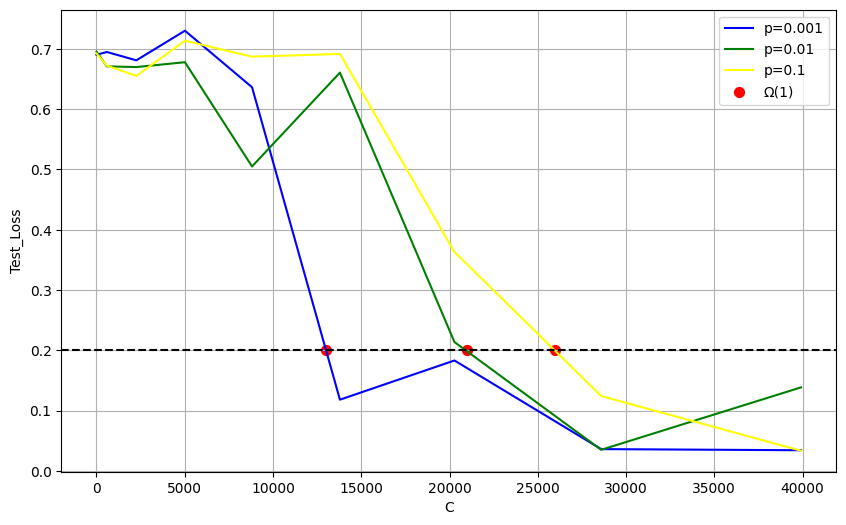

In [15]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import convolve
k = np.loadtxt('k.npy')
v1 = np.loadtxt('v_0.001.npy')
v2 = np.loadtxt('v_0.01.npy')
v3 = np.loadtxt('v_0.1.npy')
scaled_indices=k/2

scaled_indices_int = np.floor(scaled_indices)
selected_indices = scaled_indices_int

step = len(sorted_indices) // 10  # 计算步长
selected_indices = scaled_indices[::step][:9]  # 均匀选取10个序号

selected_values1 = v1[::step][:9]  # 均匀选取对应的值
selected_values2 = v2[::step][:9]  # 均匀选取对应的值
selected_values3 = v3[::step][:9]  # 均匀选取对应的值

plt.figure(figsize=(10, 6))
plt.plot(selected_indices, selected_values1, linestyle='-', color='blue', label='p=0.001')
plt.plot(selected_indices, selected_values2, linestyle='-', color='green', label='p=0.01')
plt.plot(selected_indices, selected_values3,  linestyle='-', color='yellow', label='p=0.1')

plt.scatter(13000, 0.2, color='r', s=50,label='Ω(1)')
plt.scatter(21000, 0.2, color='r', s=50)
plt.scatter(26000, 0.2, color='r', s=50 )

plt.axhline(y=0.2, color='black', linestyle='--')

plt.xlabel('C')
plt.ylabel('Test_Loss')
plt.legend(loc='best')

plt.grid(True)

plt.savefig('c.png', dpi=300, bbox_inches='tight')
plt.show()

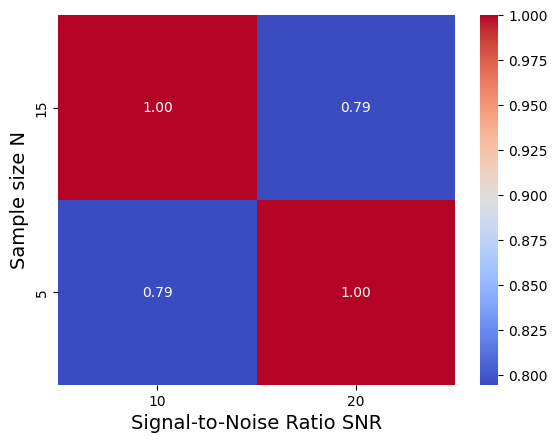

In [9]:
# 绘制的整体性相关性热图
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 假设a和b是你的两组二维矩阵数据，形状为(100, 100)
a = np.loadtxt('_0.1.npy')  # 示例数据
b = np.loadtxt('_0.001.npy')  # 示例数据

# 将NaN值替换为0
a[np.isnan(a)] = 0
b[np.isnan(b)] = 0

# 计算整体相关性
corr_matrix = np.corrcoef(a.flatten(), b.flatten())

sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f",
            xticklabels=['10', '20'],  # 设置横坐标刻度为空
            yticklabels=['15', '5'])  # 设置纵坐标刻度为空

plt.xlabel('Signal-to-Noise Ratio SNR', size=14)
plt.ylabel('Sample size N', size=14)
# 绘制相关性矩阵热图

plt.savefig('overall.png', dpi=300, bbox_inches='tight')
plt.show()